In [3]:
# source: https://www.scribd.com/document/515418555/06-Sitematika-Dummy-Book
!gdown 1QxQzDfe7FgkX0XFTaeEqm_4TGPL6niIu

Downloading...
From: https://drive.google.com/uc?id=1QxQzDfe7FgkX0XFTaeEqm_4TGPL6niIu
To: /content/dummy.pdf
100% 76.5k/76.5k [00:00<00:00, 71.1MB/s]


# docTR (Document Text Recognition)

In [ ]:
!pip install python-doctr -q
!pip install tf2onnx -q

In [2]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [4]:
model = ocr_predictor(pretrained=True)
# PDF
doc = DocumentFile.from_pdf("dummy.pdf")
# Analyze
result = model(doc)

  0%|          | 0/94122142 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

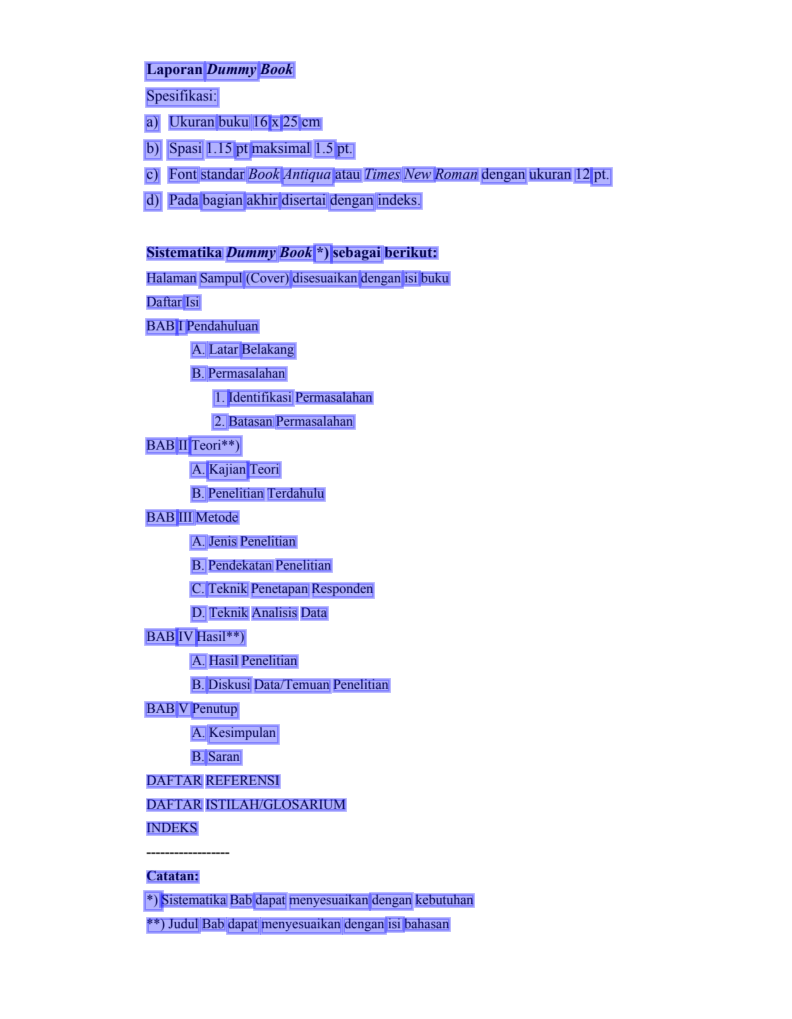

In [5]:
# Display the result (requires matplotlib & mplcursors to be installed)
result.show()

In [6]:
# Extract and print the text
for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                print(word.value, end=' ')
            print()

Laporan Dummy Book 
Spesifikasi: 
a) Ukuran buku 16 X 25 cm 
b) Spasi 1.15 pt maksimal 1.5 pt. 
c) Font standar Book Antiqua atau Times New Roman dengan ukuran 12 pt. 
d) Pada bagian akhir disertai dengan indeks. 
Sistematika Dummy Book *) sebagai berikut: 
Halaman Sampul (Cover) disesuaikan dengan isi buku 
Daftar Isi 
BAB I Pendahuluan 
A. Latar Belakang 
B. Permasalahan 
1. Identifikasi Permasalahan 
2. Batasan Permasalahan 
BAB II Teori**) 
A. Kajian Teori 
B. Penelitian Terdahulu 
A. Jenis Penelitian 
B. Pendekatan Penelitian 
C. Teknik Penetapan Responden 
D. Teknik Analisis Data 
A. Hasil Penelitian 
B. Diskusi Data/Temuan Penelitian 
BAB III Metode 
BAB IV Hasil**) 
BAB V Penutup 
A. Kesimpulan 
B. Saran 
DAFTAR REFERENSI 
DAFTAR ISTILAH/GLOSARIUM 
INDEKS 
Catatan: 
*) Sistematika Bab dapat menyesuaikan dengan kebutuhan 
**)Judul Bab dapat menyesuaikan dengan isi bahasan 


# Tesseract OCR

In [ ]:
!pip install pytesseract -q
!pip install pdf2image -q
!apt-get install poppler-utils -q
!apt-get install tesseract-ocr -q

In [8]:
import pytesseract
import io
from pdf2image import convert_from_path
import re

Read all pages of pdf

In [9]:
def extract_text_from_pdf(pdf_path):
    # convert the pdf to images
    pages = convert_from_path(pdf_path, 500)

    # extract text from each page using tesseract ocr
    text_data = ''
    for page in pages:
        text = pytesseract.image_to_string(page)
        text_data += text + '\n'

    # remove multiple new lines
    cleaned_text = re.sub(r'\n\s*\n', '\n', text_data)

    # return the cleaned text data
    return cleaned_text

text = extract_text_from_pdf('dummy.pdf')
print(text)

Laporan Dummy Book
Spesifikasi:
a) Ukuran buku 16 x 25 cm
b) Spasi 1.15 pt maksimal 1.5 pt.
c) Font standar Book Antiqua atau Times New Roman dengan ukuran 12 pt.
d) Pada bagian akhir disertai dengan indeks.
Sistematika Dummy Book *) sebagai berikut:
Halaman Sampul (Cover) disesuaikan dengan isi buku
Daftar Isi
BAB I Pendahuluan
A. Latar Belakang
B. Permasalahan
1. Identifikasi Permasalahan
2. Batasan Permasalahan
BAB II Teori**)
A. Kajian Teor
B. Penelitian Terdahulu
BAB III Metode
A. Jenis Penelitian
B. Pendekatan Penelitian
C. Teknik Penetapan Responden
D. Teknik Analisis Data
BAB IV Hasil**)
A. Hasil Penelitian
B. Diskusi Data/Temuan Penelitian
BAB V Penutup
A. Kesimpulan
B. Saran
DAFTAR REFERENSI
DAFTAR ISTILAH/GLOSARIUM
INDEKS
Catatan:
*) Sistematika Bab dapat menyesuaikan dengan kebutuhan
**) Judul Bab dapat menyesuaikan dengan isi bahasan



Read single page of pdf

In [13]:
def extract_text_from_pdf(pdf_path, page_number):
    # convert the specified page to image
    pages = convert_from_path(pdf_path, 500, first_page=page_number, last_page=page_number)
    page = pages[0]

    # extract text from the page using tesseract ocr
    text = pytesseract.image_to_string(page)

    # remove multiple new lines
    cleaned_text = re.sub(r'\n\s*\n', '\n', text)

    # return the text data
    return cleaned_text

# specify the page number you want to extract
page_number = 1
text = extract_text_from_pdf('dummy.pdf', page_number)
print(text)

Laporan Dummy Book
Spesifikasi:
a) Ukuran buku 16 x 25 cm
b) Spasi 1.15 pt maksimal 1.5 pt.
c) Font standar Book Antiqua atau Times New Roman dengan ukuran 12 pt.
d) Pada bagian akhir disertai dengan indeks.
Sistematika Dummy Book *) sebagai berikut:
Halaman Sampul (Cover) disesuaikan dengan isi buku
Daftar Isi
BAB I Pendahuluan
A. Latar Belakang
B. Permasalahan
1. Identifikasi Permasalahan
2. Batasan Permasalahan
BAB II Teori**)
A. Kajian Teor
B. Penelitian Terdahulu
BAB III Metode
A. Jenis Penelitian
B. Pendekatan Penelitian
C. Teknik Penetapan Responden
D. Teknik Analisis Data
BAB IV Hasil**)
A. Hasil Penelitian
B. Diskusi Data/Temuan Penelitian
BAB V Penutup
A. Kesimpulan
B. Saran
DAFTAR REFERENSI
DAFTAR ISTILAH/GLOSARIUM
INDEKS
Catatan:
*) Sistematika Bab dapat menyesuaikan dengan kebutuhan
**) Judul Bab dapat menyesuaikan dengan isi bahasan

